# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [5]:
! git clone https://github.com/gffiveash/Visualization

fatal: destination path 'Visualization' already exists and is not an empty directory.


In [2]:
! pip install seaborn

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

## Grayson's Code - Q2

In [3]:
# Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/Visualization/assignment/data/airbnb_hw.csv', low_memory=False)

In [9]:
# Cleaning 'Price' variable, from Wrangling Assignment #1
df['Price'].unique()
df['Price']= pd.to_numeric(df['Price'],errors='coerce')
print(df['Price'].unique())

[145.  37.  28. 199. 549. 149. 250.  90. 270. 290. 170.  59.  49.  68.
 285.  75. 100. 150. 700. 125. 175.  40.  89.  95.  99. 499. 120.  79.
 110. 180. 143. 230. 350. 135.  85.  60.  70.  55.  44. 200. 165. 115.
  74.  84. 129.  50. 185.  80. 190. 140.  45.  65. 225. 600. 109.  nan
  73. 240.  72. 105. 155. 160.  42. 132. 117. 295. 280. 159. 107.  69.
 239. 220. 399. 130. 375. 585. 275. 139. 260.  35. 133. 300. 289. 179.
  98. 195.  29.  27.  39. 249. 192. 142. 169. 131. 138. 113. 122. 329.
 101. 475. 238. 272. 308. 126. 235. 315. 248. 128.  56. 207. 450. 215.
 210. 385. 445. 136. 247. 118.  77.  76.  92. 198. 205. 299. 222. 245.
 104. 153. 349. 114. 320. 292. 226. 420. 500. 325. 307.  78. 265. 108.
 123. 189.  32.  58.  86. 219. 800. 335.  63. 229. 425.  67.  87. 158.
 650. 234. 310. 695. 400. 166. 119.  62. 168. 340. 479.  43. 395. 144.
  52.  47. 529. 187. 209. 233.  82. 269. 163. 172. 305. 156. 550. 435.
 137. 124.  48. 279. 330. 134. 378.  97. 277.  64. 193. 147. 186. 264.
  30. 

In [10]:
# Question 2
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [11]:
print(df.shape)
print(df.columns)

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


This illustrates that there are 30,478 observations and 13 variables in this dataset. The thirteen variables are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price, and Review Scores Rating.

In [12]:
# Question 3
pd.crosstab(df['Room Type'],df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


The large majority of property types, no matter if they are renting an entire home/apartment, private room, or shared room, are Apartments. House and Loft appear to be the second most common property types, followed by condominium and townhouse. This makes sense because these are very traditional property types. I wasn't expecting there to be so many property types, like castle, lighthouse, and treehouse. The data clearly shows they have significantly less availability. For private rooms specifically, it appears it is most common to rent a private room in an apartment - then a house. It's likely that the availability of private rooms in many of these other property types is only 1 because only one room exists in property types like castles or campers/RVs.

<Axes: xlabel='Price', ylabel='Count'>

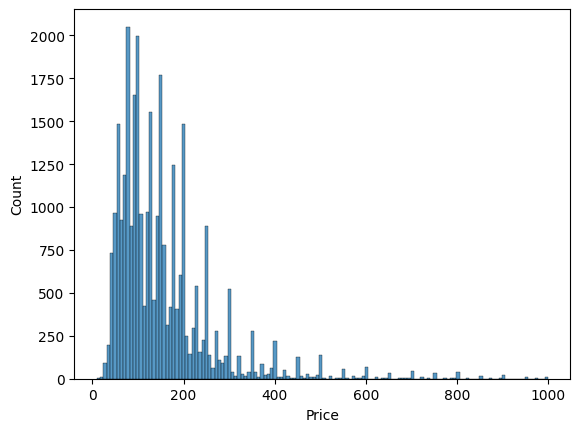

In [13]:
# Question 4
# Histogram
sns.histplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

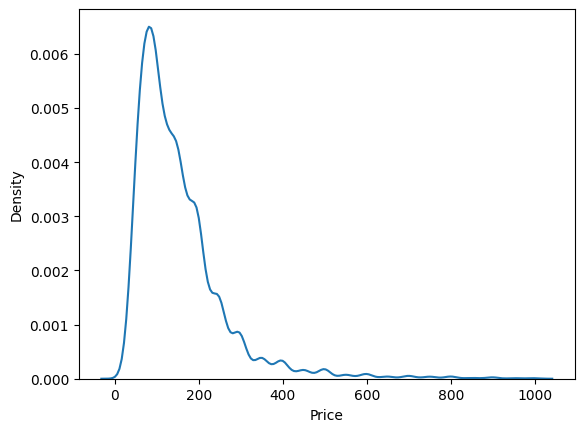

In [14]:
# Kernel Density
sns.kdeplot(data=df,x='Price')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

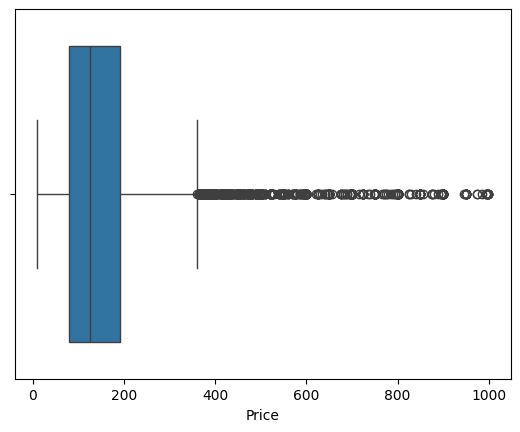

In [15]:
#Boxplot
sns.boxplot(data=df,x='Price')

In [16]:
#Statistical description of 'Price'
df['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [17]:
print(df.shape)

(30478, 13)


The data is badly scaled because, as we see above, the 'Price' variable has a very long tail. This is confirmed when we smooth the variable using the natural logarithm, which helps shrink the larger values (outliers). All the plots clearly illustrate the presence of outliers in the Airbnb dataset. Within the histogram, you can see the extreme values because there are so many bins with very low values. The Kernel Density plot has a very long tail, showing how the majority of Price values are concentrated in the 0-300 range, while the rest are outliers. On the boxplot, you can very clearly see the outliers outside of the interquartile range and "whiskers."

<Axes: xlabel='Price_log', ylabel='Count'>

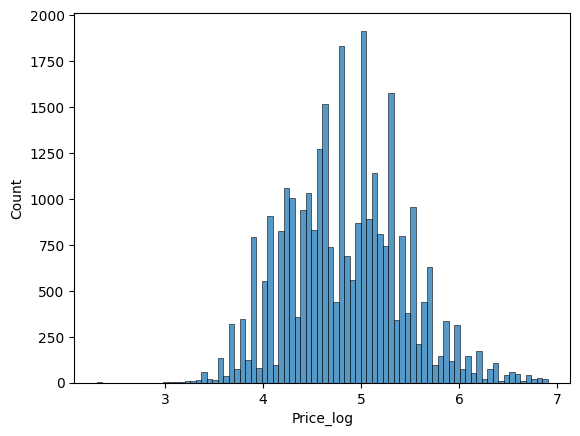

In [18]:
# Histogram with log
df['Price_log'] = np.log(df['Price'])
sns.histplot(df['Price_log'])

<Axes: xlabel='Price_log', ylabel='Density'>

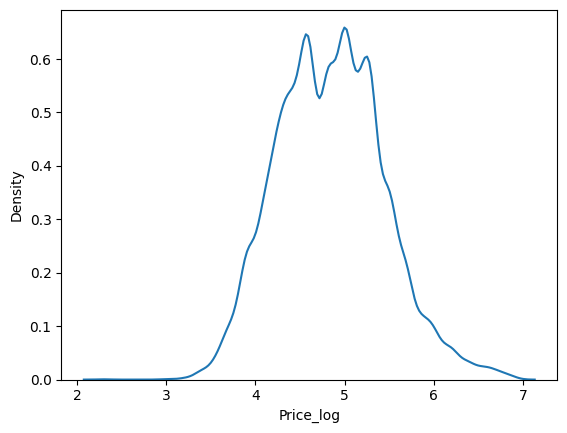

In [19]:
# Kernel density with log
sns.kdeplot(data=df,x='Price_log')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

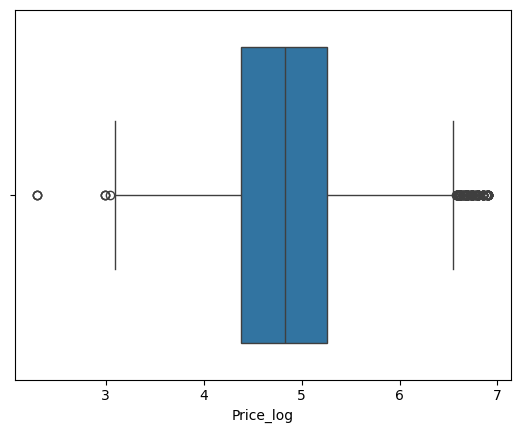

In [20]:
# Boxplot with log
sns.boxplot(data=df,x='Price_log')

In [21]:
df['Price_log'].describe()

,Price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


<Axes: xlabel='Price_log', ylabel='Beds'>

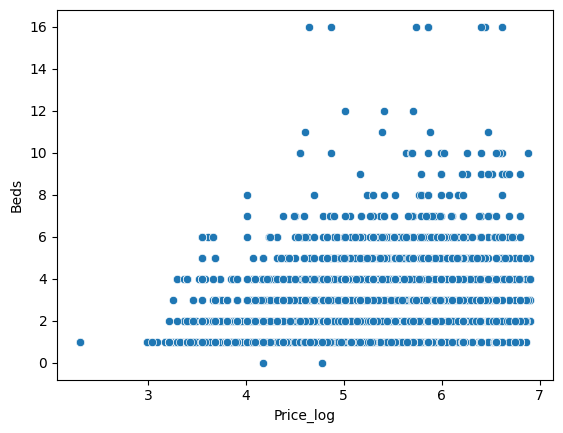

In [22]:
# Question 5
sns.scatterplot(x=df['Price_log'],y=df['Beds'])

From this scatterplot plot, you can see that as the number of beds increases, the points shift to the right, suggesting an upward trend: generally, prices rise with the number of beds, at least up to a certain point. However, when the bed count becomes almost too high (10, 12, 14, etc.), we begin to see more outliers, indicating occasional price drops from the average. This all is confirmed below when we use groupby().

In [23]:
var='Price'
group='Beds'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

As the number of beds increases, the average price, for the most part, steadily increases as well. Interstingly, the only significant drops are between 9 and 10 beds, 10 and 11 beds, and 11 and 12 beds. From personal experience, such drastic decreases in price could be attributed to an Airbnb attempting to cram as many people as possible, likely de-valuing the apartment/house/etc. With regard to standard deviation, on a similar note, it steadily increases until 7 beds turns into 8 beds, suggesting more variance in the price points.

<Axes: xlabel='Price_log', ylabel='Beds'>

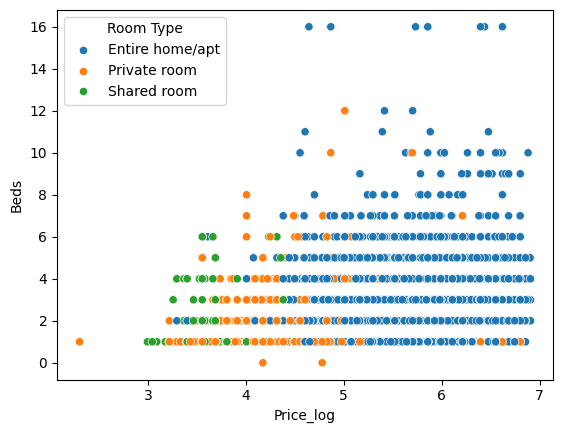

In [24]:
# Question 6
sns.scatterplot(x=df['Price_log'],y=df['Beds'], hue=df['Room Type'])

From this plot, we can see that the shared room (green) and private room (orange) are typically cheaper than entire homes/apts (blue). The green and orange are concentrated toward the left - the lower end of the price spectrum. Even when a shared room or private room has more beds, it does not necessarily follow the trend we identified before - that as we increase the number of beds, price increases. These green and orange plot points are still on the cheaper end, despite the number of beds increasing.

In [25]:
var='Price'
group='Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                        
                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0

The average price is highest for an entire room/apartment. This makes sense because many prefer their own space over a private room within someone else's home/apartment or a shared room. Shared rooms have the lowest average price. Entire homes/apartments have the highest standard deviation, which means it has the most variability in the data. I think the median would be a more reliable estimate of central tendency because of the presence of so many outliers. The outliers can skew the mean, and make it non-representative of the data.

<Axes: xlabel='Price_log', ylabel='Beds'>

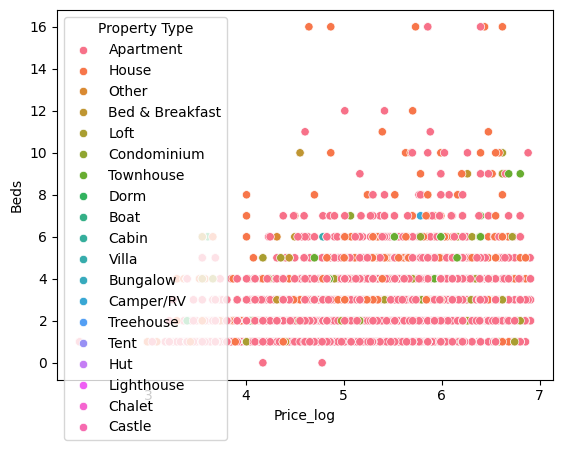

In [26]:
 sns.scatterplot(x=df['Price_log'],y=df['Beds'],hue=df['Property Type'])

While it is a bit difficult to decipher the colors, we can see the large majority of data points are apartments (pink) and houses (orange). There is the occasional green point (condominium, loft, townhouse, etc).

In [27]:
var='Price'
group='Property Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         93.0  237.946237  172.754121   46.0  130.00  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2060.0  131.598058  127.421195   10.0   60.00   84.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               738.0  193.166667  169.094068   30.0   80.00  135.0   
Other               42.0  201.166667  183.231150   39.0   80.50  122.5   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          134.0  179.365672  152.097295   45.0   88.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                7.0  160.571429   83.908397   60.0   95.00  180.0   

                                
                    75%    max  
Property Type                   
Apartment        195.00  999.0  
Bed & Breakfast  125.00  900.0  
Boat             178.50  250.0  
Bungalow         177.75  195.0  
Cabin            207.50  250.0  
Camper/RV        109.00  325.0  
Castle           150.00  150.0  
Chalet            99.00   99.0  
Condominium      295.00  850.0  
Dorm              80.00  200.0  
House            150.00  997.0  
Hut               87.50  100.0  
Lighthouse        39.00   39.0  
Loft             225.75  985.0  
Other            256.25  850.0  
Tent             175.00  250.0  
Townhouse        200.00  900.0  
Treehouse        156.00  300.0  
Villa            197.50  299.0

It is interesting because the highest average price does not correspond to the most common property type (apartment). Interestingly enough, condominiums have the highest average price, whereas lighthouses have the lowest average price. 'Other' has the highest standard deviation, which makes sense given there'd likely be a ton of variability in a category like 'Other' where we have no idea what property types are considered. It could be anything from a mansion to a doghouse. With regard to mean and median, the same goes for this situation - the median is a better estimate of central tendency due to the presence of outliers.

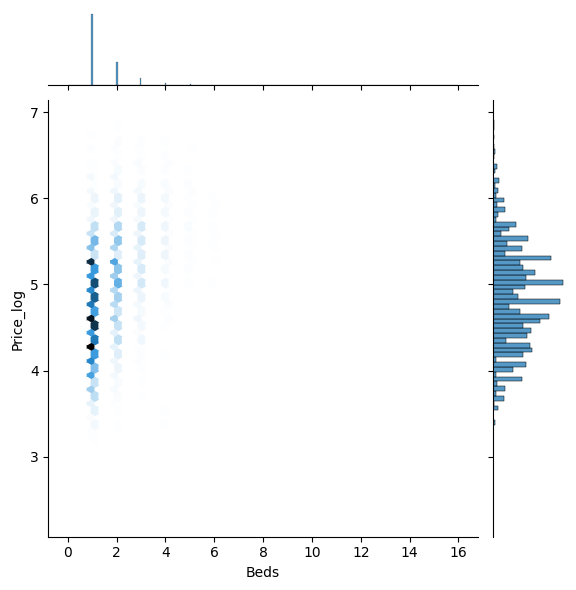

In [28]:
# Question 7
var2 = df['Price_log']
var1 = df['Beds']
sns.jointplot(x=var1,y=var2,data=df, kind='hex')

The relationship between the scatterplot and histogram in this jointplot shows how most Airbnb properties have between 1 and 4 beds, with 1 bed clearly dominating. Additionally, the Price_log variable primiarily ranges between 4 and 6. This makes me reconsider the other graphs we've analyzed because this jointplot presents the data in a clear and more straightforwrd manner. I feel like all of the outliers and chaos of scatterplots distracted me.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

## Grayson's Code - Question #4
1. Data Set: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-survey-file
2. Yes, the data dictionary documents how missing values are handled. If it is missing, it is documented as '.' meaning inapplicable/missing. However, some variables also use '.D' or .'R' or '.n' to denote don't know, refused, or not ascertained, which could be considered missing variables in some cases as well. I think overall the data dictionary does a good job of describing what exactly the each variable and value means.
3. A few variables that stuck out to me are: FIS_SKIPMEAL (adults skip meals due to cost), RXS_PDKNOW (Mcare RX drug benefit knowledge), and RXS_SKIPRX (how often skipped doses to make Rx last ). I think comparing adults that skip meals due to cost and adults who skip prescription doses to make Rx last longer could be interesting and telling of their habits - if you skip meals, are you more likely to skip doses? Also, making a histogram of Mcare RX drug benefit knowledge can illustrate how well/unaware beneficiaries understand potential benefits.


In [30]:
df1 = pd.read_csv('/content/sfpuf2021_3_summer.csv')

In [32]:
df1.head()

,PUF_ID,SURVEYYR,VERSION,CVS_ONEDOSE,CVS_TWODOSE,CVS_VCNUMS,FIS_FOODLAST,FIS_AFFDMEAL,FIS_SKIPMEAL,FIS_EATLESS,...,PUFS091,PUFS092,PUFS093,PUFS094,PUFS095,PUFS096,PUFS097,PUFS098,PUFS099,PUFS100
0,21000003,2021,1,1,1,3.0,2,3,2,1,...,1514.467942,8667.712494,2051.744906,2212.585993,9580.938257,1827.471189,9757.388299,2221.541391,7313.791799,1509.383145
1,21000004,2021,1,1,1,4.0,2,3,2,2,...,29370.241003,4344.868949,3346.069483,3144.425325,4794.225838,20464.032605,23459.065322,20606.019549,20722.767270,22192.119313
2,21000012,2021,1,1,1,3.0,2,1,2,2,...,20825.975609,25827.374203,15999.055755,3477.538940,3019.196592,3424.636870,2936.556467,24171.454536,19156.542361,18290.764044
3,21000026,2021,1,1,1,4.0,2,3,D,2,...,939.296224,5186.072054,836.601141,639.612412,4761.177749,864.743176,5644.715691,3379.378686,865.485822,987.890486
4,21000031,2021,1,1,1,3.0,3,3,2,2,...,3113.197345,3933.853896,3015.397706,17114.935540,18612.310594,20477.720949,18619.382715,19503.062566,15117.249425,2951.475626


In [31]:
# Cleaning 'FIS_SKIPMEAL' variable to remove D and R, denoting "Don't Know" or "Refused"
print(df1['FIS_SKIPMEAL'].unique())
df1['FIS_SKIPMEAL'].value_counts()

['2' 'D' '1' 'R']


,count
FIS_SKIPMEAL,
2,7036
1,484
D,9
R,9


In [33]:
df1['FIS_SKIPMEAL'] = df1['FIS_SKIPMEAL'].replace(['D','R'],np.nan)
print(df1['FIS_SKIPMEAL'].unique())
df1['FIS_SKIPMEAL']= pd.to_numeric(df1['FIS_SKIPMEAL'],errors='coerce')

['2' nan '1']


In [34]:
df1['FIS_SKIPMEAL'].dtypes

dtype('float64')

In [35]:
# Cleaning 'RXS_SKIPRX' variable to remove D and R, denoting "Don't Know" or "Refused"
print(df1['RXS_SKIPRX'].unique())
df1['RXS_SKIPRX'].value_counts()

['3' 'D' '2' '1' 'R']


,count
RXS_SKIPRX,
3,7228
2,235
1,60
R,8
D,7


In [36]:
df1['RXS_SKIPRX'] = df1['RXS_SKIPRX'].replace(['D','R'],np.nan)
print(df1['RXS_SKIPRX'].unique())
df1['RXS_SKIPRX']= pd.to_numeric(df1['RXS_SKIPRX'],errors='coerce')

['3' nan '2' '1']


In [37]:
df1['RXS_SKIPRX'].dtypes

dtype('float64')

In [38]:
# Cleaning 'RXS_PDKNOW' variable to remove '.', denoting "Inapplicable/missing"
print(df1['RXS_PDKNOW'].unique())
df1['RXS_PDKNOW'].describe()

['5' '2' 'D' '4' '3' '1' nan 'R' 'N']


,RXS_PDKNOW
count,7108
unique,8
top,2
freq,2190


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='RXS_SKIPRX'>

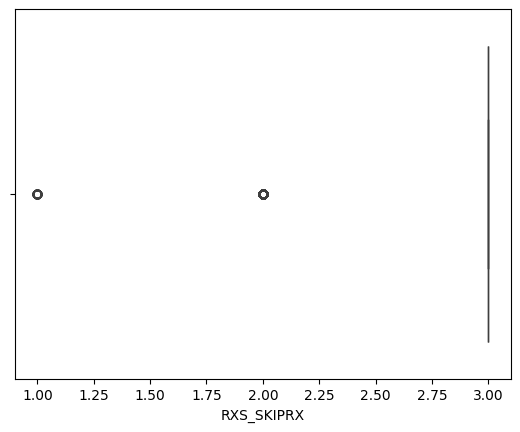

In [39]:
# Question 4
sns.boxplot(data=df1,x='RXS_SKIPRX')

The reason this boxplot looks so strange and lacks the interquartile range is because, since there are only a few unique values for RXS_SKIPRX, there is not much variability in the data. So, we have the maximum of at the value 3 (because the highest number of respondents do not skip their doses) and the other two points are represented as outliers. The variables in this dataset really don't make a compelling boxplot because of this lack of variability.

<Axes: xlabel='RXS_PDKNOW', ylabel='Count'>

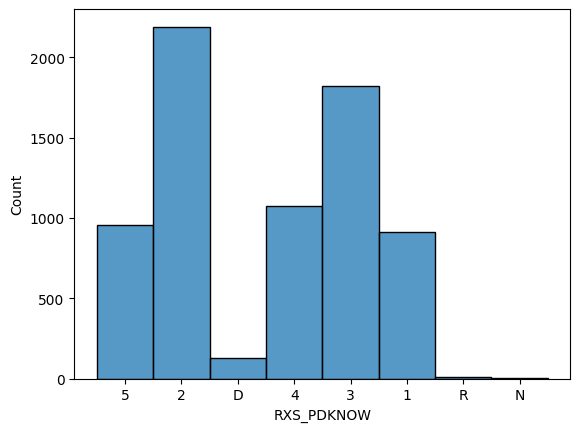

In [40]:
# Histogram of RXS_PDKNOW (Mcare Rx drug benefit knowledge)
sns.histplot(df1['RXS_PDKNOW'])

Here, the outliers appear to be D, N, and R, which means don't know, not ascertained, and refused. This is promising that a majority of beneficiaries, to an extent, understand Mcare Rx drug benefits.

<Axes: xlabel='RXS_SKIPRX', ylabel='Count'>

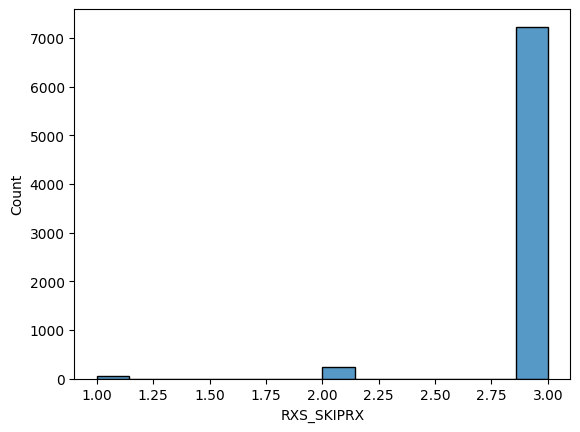

In [41]:
# Question 5
sns.histplot(df1['RXS_SKIPRX'])

<Axes: xlabel='RXS_SKIPRX_log', ylabel='Count'>

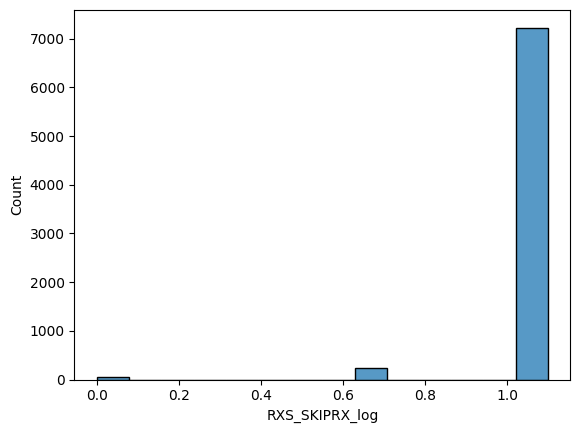

In [42]:
# Histogram with log
df1['RXS_SKIPRX_log'] = np.log(df1['RXS_SKIPRX'])
sns.histplot(df1['RXS_SKIPRX_log'])

By taking the log, this confirms that the RXS_SKIPRX (how often skipped doses to make Rx last) does not need scaling. Both histograms represent the same RXS_SKIPRX data. It illustrates how most medicare beneficiaries do not skip doses to make Rx last, represented by the value 3. In contrast, only 60 people reported skiping often (denoted by a value of 1), which we can see in the graph, with the very low heigh of the first bar.

<Axes: xlabel='RXS_SKIPRX', ylabel='Density'>

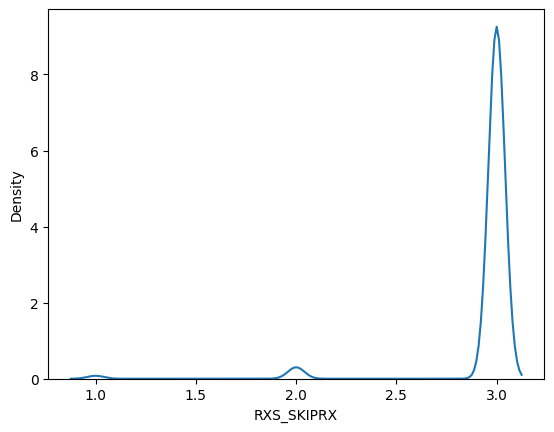

In [43]:
# Kernel density plot for RXS_SKIPRX (skipped doses to make Rx last)
sns.kdeplot(data=df1,x='RXS_SKIPRX')

<Axes: xlabel='RXS_SKIPRX', ylabel='FIS_SKIPMEAL'>

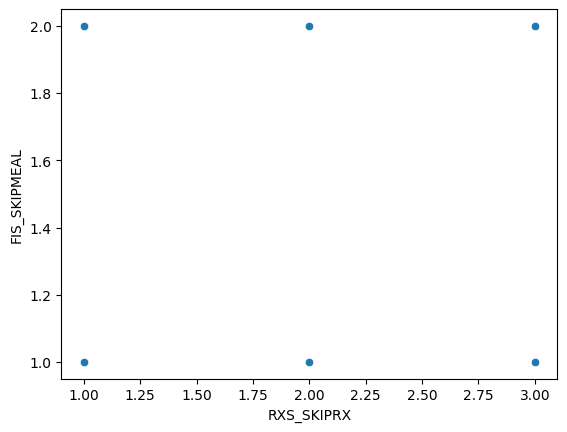

In [44]:
# Question 6
sns.scatterplot(x=df1['RXS_SKIPRX'],y=df1['FIS_SKIPMEAL'])

The reason the scatterplot looks strange is because of the nature of this dataset. Every numerical variable only has up to 3-4 unique values. So, in the case of RXS_SKIPRX, all of the particpants either selected 1, 2, or 3, denoting often, sometimes, or never. For FIS_SKIPMEAL, all the particpants either selected 1 or 2, denoting yes or no.

I was hoping to see if there was a relationship between if people skipped meals to save money and if people skipped doeses to save Rx. Is a person more likely to do one when they do the other?

In [45]:
var='RXS_SKIPRX'
group='FIS_SKIPMEAL'
df1.loc[:,[group,var]].groupby(group).describe()

RXS_SKIPRX                                             
                  count      mean       std  min  25%  50%  75%  max
FIS_SKIPMEAL                                                        
1.0               482.0  2.746888  0.545479  1.0  3.0  3.0  3.0  3.0
2.0              7026.0  2.967122  0.202969  1.0  3.0  3.0  3.0  3.0

<Axes: xlabel='RXS_SKIPRX', ylabel='FIS_SKIPMEAL'>

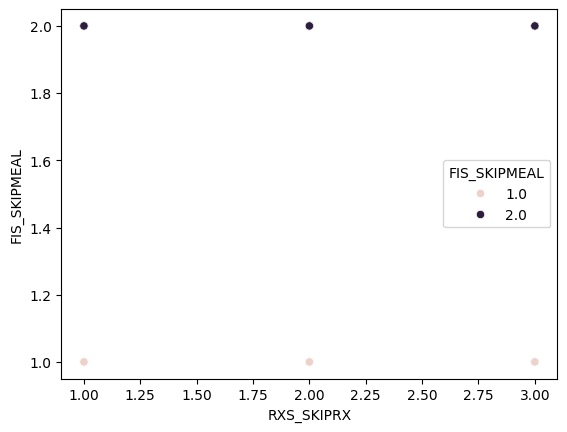

In [46]:
 sns.scatterplot(x=df1['RXS_SKIPRX'],y=df1['FIS_SKIPMEAL'],hue=df1['FIS_SKIPMEAL'])

If I am correct, this scatterplot does technically show how if someone skips their doses often (value 1 on x-axis), according to the grouping, they also will skip meals (value 1 on y-axis and colored by the light pink). But this should be taken with a grain of salt because all of the, for example 7,000+ people who responded no to skipping meals (denoted by a value of 2), are represented by a single dot. This is just due to the nature of the data collection/survey itself.

In [47]:
# Question 7
pd.crosstab(df1['RXS_SKIPRX'],df1['FIS_SKIPMEAL'])

FIS_SKIPMEAL,1.0,2.0
RXS_SKIPRX,,
1.0,26,33
2.0,70,165
3.0,386,6828


This cross-tabulation shows how most people (~6,800) never skip their Rx doses and do not skip meals due to cost. Only 26 people skip their meals due to cost AND skip their doses to save Rx.